
# Assemble images with simple image stitching

This example demonstrates how a set of images can be assembled under
the hypothesis of rigid body motions.


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
from skimage.color import rgb2gray
from skimage.feature import match_descriptors
from skimage.measure import ransac
from skimage.transform import ProjectiveTransform
from skimage.feature import SIFT, plot_matches

In [42]:
def stitch_images(image1, image2):
    # Initialize SIFT detector
    sift = SIFT()
    sift.detect_and_extract(image1)
    keypoints1 = sift.keypoints
    descriptors1 = sift.descriptors
    sift.detect_and_extract(image2)
    keypoints2 = sift.keypoints
    descriptors2 = sift.descriptors

    # Find matching keypoints between images
    matches = match_descriptors(descriptors1, descriptors2, cross_check=True)

    # Estimate homography using RANSAC
    src = keypoints1[matches[:, 0]][:, ::-1]
    dst = keypoints2[matches[:, 1]][:, ::-1]
    model_robust, inliers = ransac((src, dst), ProjectiveTransform, min_samples=4,
                                   residual_threshold=2)

    # Warp images to align them
    warped_image1 = transform.warp(image1, model_robust.inverse, output_shape=(image1.shape[0], image1.shape[1]))
    warped_image2 = transform.warp(image2, (model_robust.inverse).inverse, output_shape=(image2.shape[0], image2.shape[1]))

    # Combine images
    stitched_image = np.maximum(warped_image1, warped_image2)
    plt.imshow(stitched_image)
    plt.show()

    return stitched_image

## Data generation

For this example, we generate a list of slightly tilted noisy images.



In [30]:
image1 = io.imread('../data/NUsample/n003-2018-01-02-11-48-43+0800__CAM_BACK__1514864956159109.jpg')
image2 = io.imread('../data/NUsample/n003-2018-01-02-11-48-43+0800__CAM_BACK_LEFT__1514864956197197.jpg')
image3 = io.imread('../data/NUsample/n003-2018-01-02-11-48-43+0800__CAM_FRONT_LEFT__1514864956138205.jpg')
image4 = io.imread('../data/NUsample/n003-2018-01-02-11-48-43+0800__CAM_FRONT__1514864956220368.jpg')
image5 = io.imread("../data/NUsample/n003-2018-01-02-11-48-43+0800__CAM_FRONT_RIGHT__1514864966493989.jpg")
image6 = io.imread("../data/NUsample/n003-2018-01-02-11-48-43+0800__CAM_BACK_RIGHT__1514864936124954.jpg")

image1 = rgb2gray(image1)
image2 = rgb2gray(image2)
image3 = rgb2gray(image3)
image4 = rgb2gray(image4)
image5 = rgb2gray(image5)
image6 = rgb2gray(image6)

img_list = [image1, image2, image3, image4, image5, image6]

C:\Users\youto\AppData\Local\Temp\ipykernel_68072\2655035915.py:16: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(ax[0, 0], image1, image2, keypoints1, keypoints2, matches)


<Axes: >

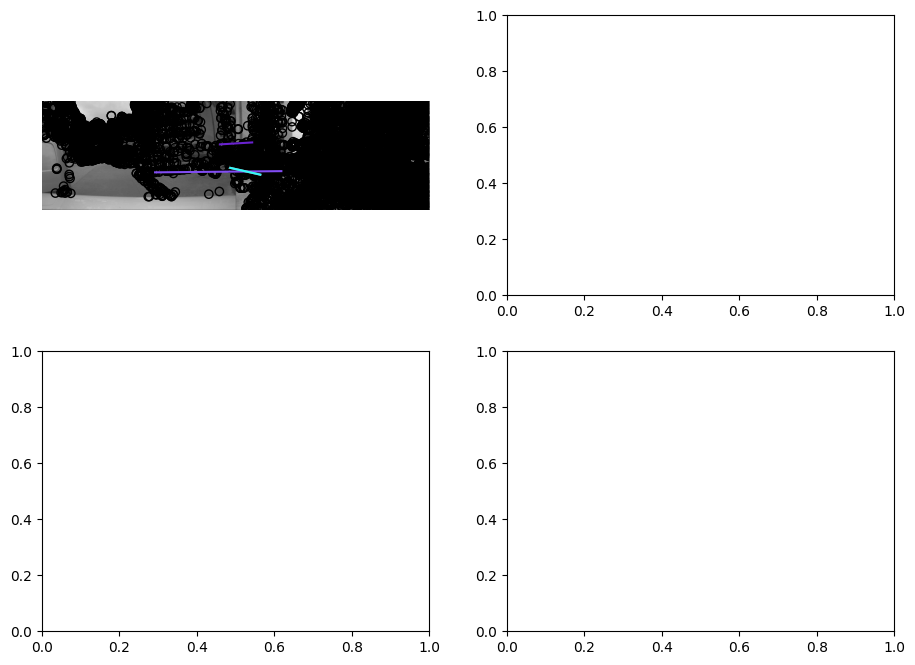

In [47]:
sift = SIFT()
sift.detect_and_extract(image1)
keypoints1 = sift.keypoints
descriptors1 = sift.descriptors
sift.detect_and_extract(image2)
keypoints2 = sift.keypoints
descriptors2 = sift.descriptors

# Find matching keypoints between images
matches = match_descriptors(descriptors1, descriptors2, cross_check=True, max_ratio=0.6)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11, 8))

plt.gray()

plot_matches(ax[0, 0], image1, image2, keypoints1, keypoints2, matches)
ax[0, 0].axis('off')
ax[0, 0]

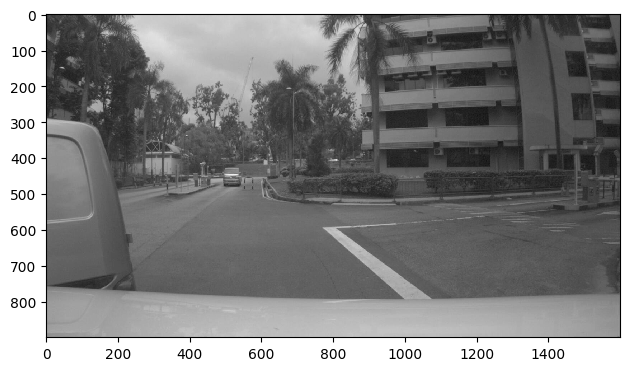

In [31]:
io.imshow(img_list[0])

In [27]:
np.array(image1)

array([[2.33650196e-01, 2.65022745e-01, 2.80709020e-01, ...,
        3.64438039e-01, 3.80124314e-01, 3.65372549e-03],
       [2.37571765e-01, 2.49336471e-01, 2.65022745e-01, ...,
        3.60516471e-01, 3.76202745e-01, 5.65490196e-04],
       [2.39521176e-01, 2.27756471e-01, 2.39521176e-01, ...,
        3.56594902e-01, 3.72281176e-01, 5.65490196e-04],
       ...,
       [5.61349804e-01, 5.61349804e-01, 5.61349804e-01, ...,
        6.11496863e-01, 5.99732157e-01, 5.65490196e-04],
       [5.69192941e-01, 5.69192941e-01, 5.69192941e-01, ...,
        5.68359608e-01, 5.56594902e-01, 1.17379216e-01],
       [5.65490196e-04, 5.65490196e-04, 5.65490196e-04, ...,
        1.14968627e-02, 6.63988235e-02, 5.65490196e-04]])

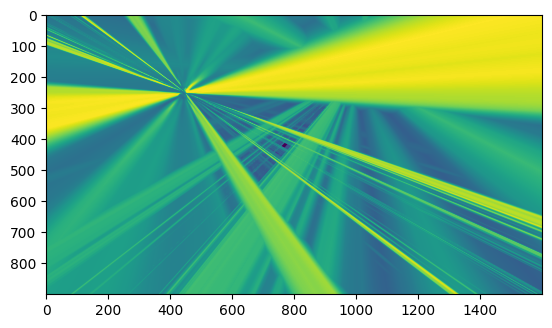

1


KeyboardInterrupt: 

In [43]:
stitched_image = img_list[0]
for i in range(1, len(img_list)):
    stitched_image = stitch_images(stitched_image, img_list[i])
    print(i)

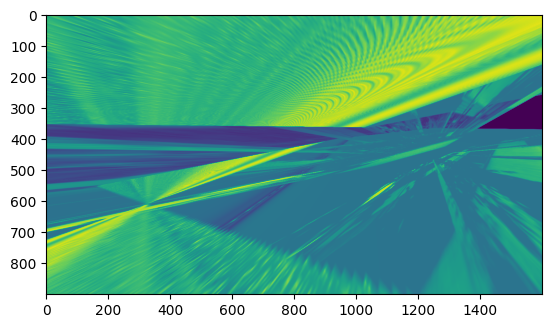

In [41]:
plt.imshow(stitched_image)